In [11]:
# Import du jeu de donnée
import pandas as pd
import numpy as np

# copy on write

df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
# On affiche les colonnes
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


<Axes: >

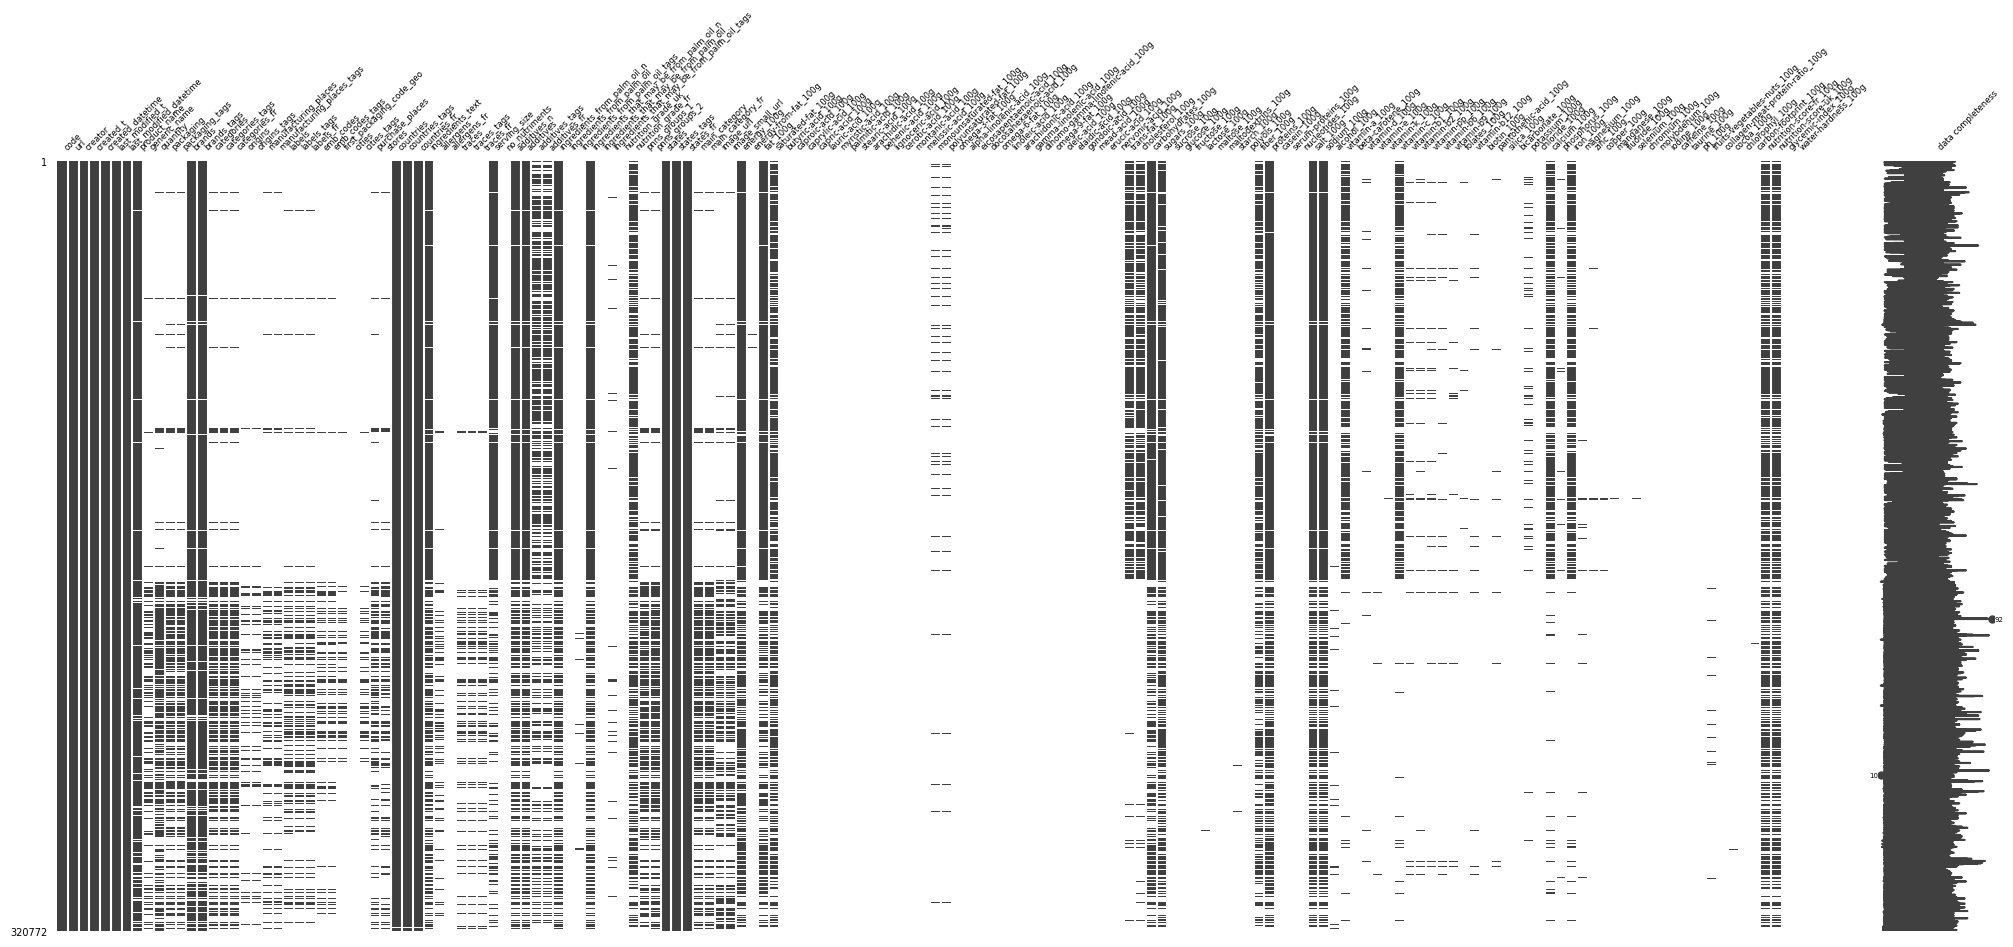

In [12]:
# missingno matrice avec label
import missingno as msno
msno.matrix(df, labels=True, fontsize=6)

<Axes: >

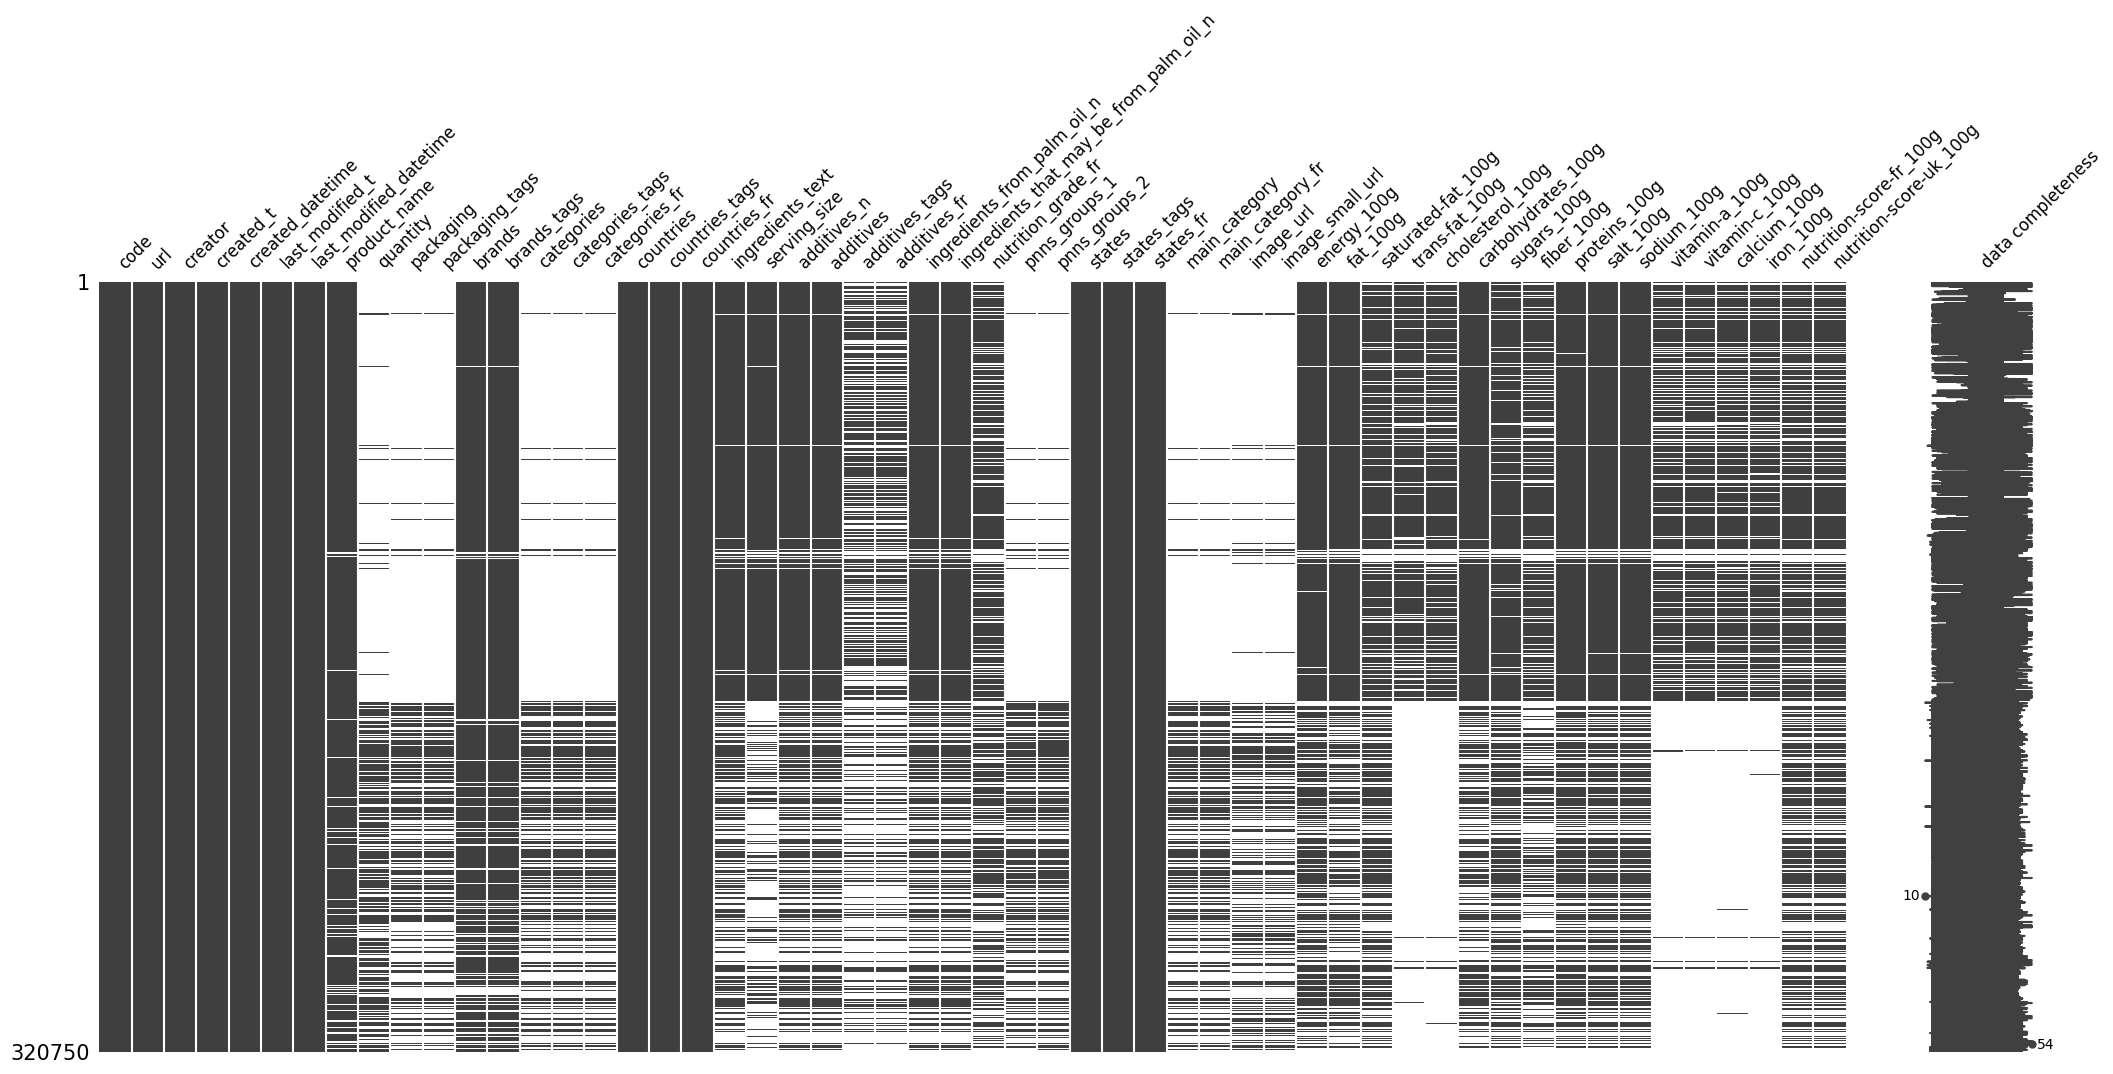

In [13]:
# On enlève les colonnes avec moins de 10% de valeurs présentes
df2_under_10 = df.dropna(thresh=0.2*df.shape[0], axis=1)
# On retire les doublons pour la catégorie code et on garde le premier
df2_under_10 = df2_under_10.drop_duplicates(subset='code', keep='first')
# On affiche les colonnes
msno.matrix(df2_under_10, labels=True, fontsize=12)

In [14]:
# Les pnns_groups_1 regroupe les différentes catégories de produits, cependant tout n'est pas orthographié de la même manière
df3_pnns = df2_under_10.copy()

# Nettoyage des valeurs de pnns_groups_1, enlever les - et mettre en majuscule, remplacer Unknown par NaN
df3_pnns['pnns_groups_1'] = df3_pnns['pnns_groups_1'].str.replace('-',' ').str.capitalize().replace('Unknown',np.nan)

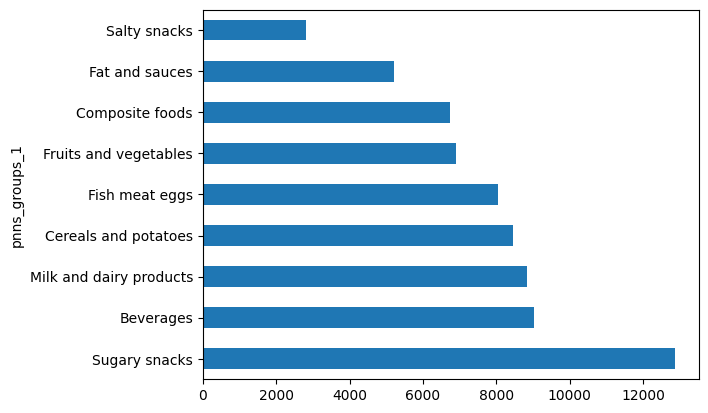

In [15]:
# Graphique
import matplotlib.pyplot as plt
df3_pnns['pnns_groups_1'].value_counts().plot(kind='barh')
plt.show()


Nous allons réaliser des box plots en fonction des data que nous avons et par catégorie pour voir si l'on peut prédire le jeu de donnée. A en juger par la matrice de missing no. Une bonne moitié d'entre eux sont présent malgré la présence des _100g. Peut être qu'une méthode de regression logistique pourrait fonctionner. On va réaliser quelques analyses complémentaires pour voir à l'oeil s'il y a quelques variations visuellement intéressantes.

<Axes: >

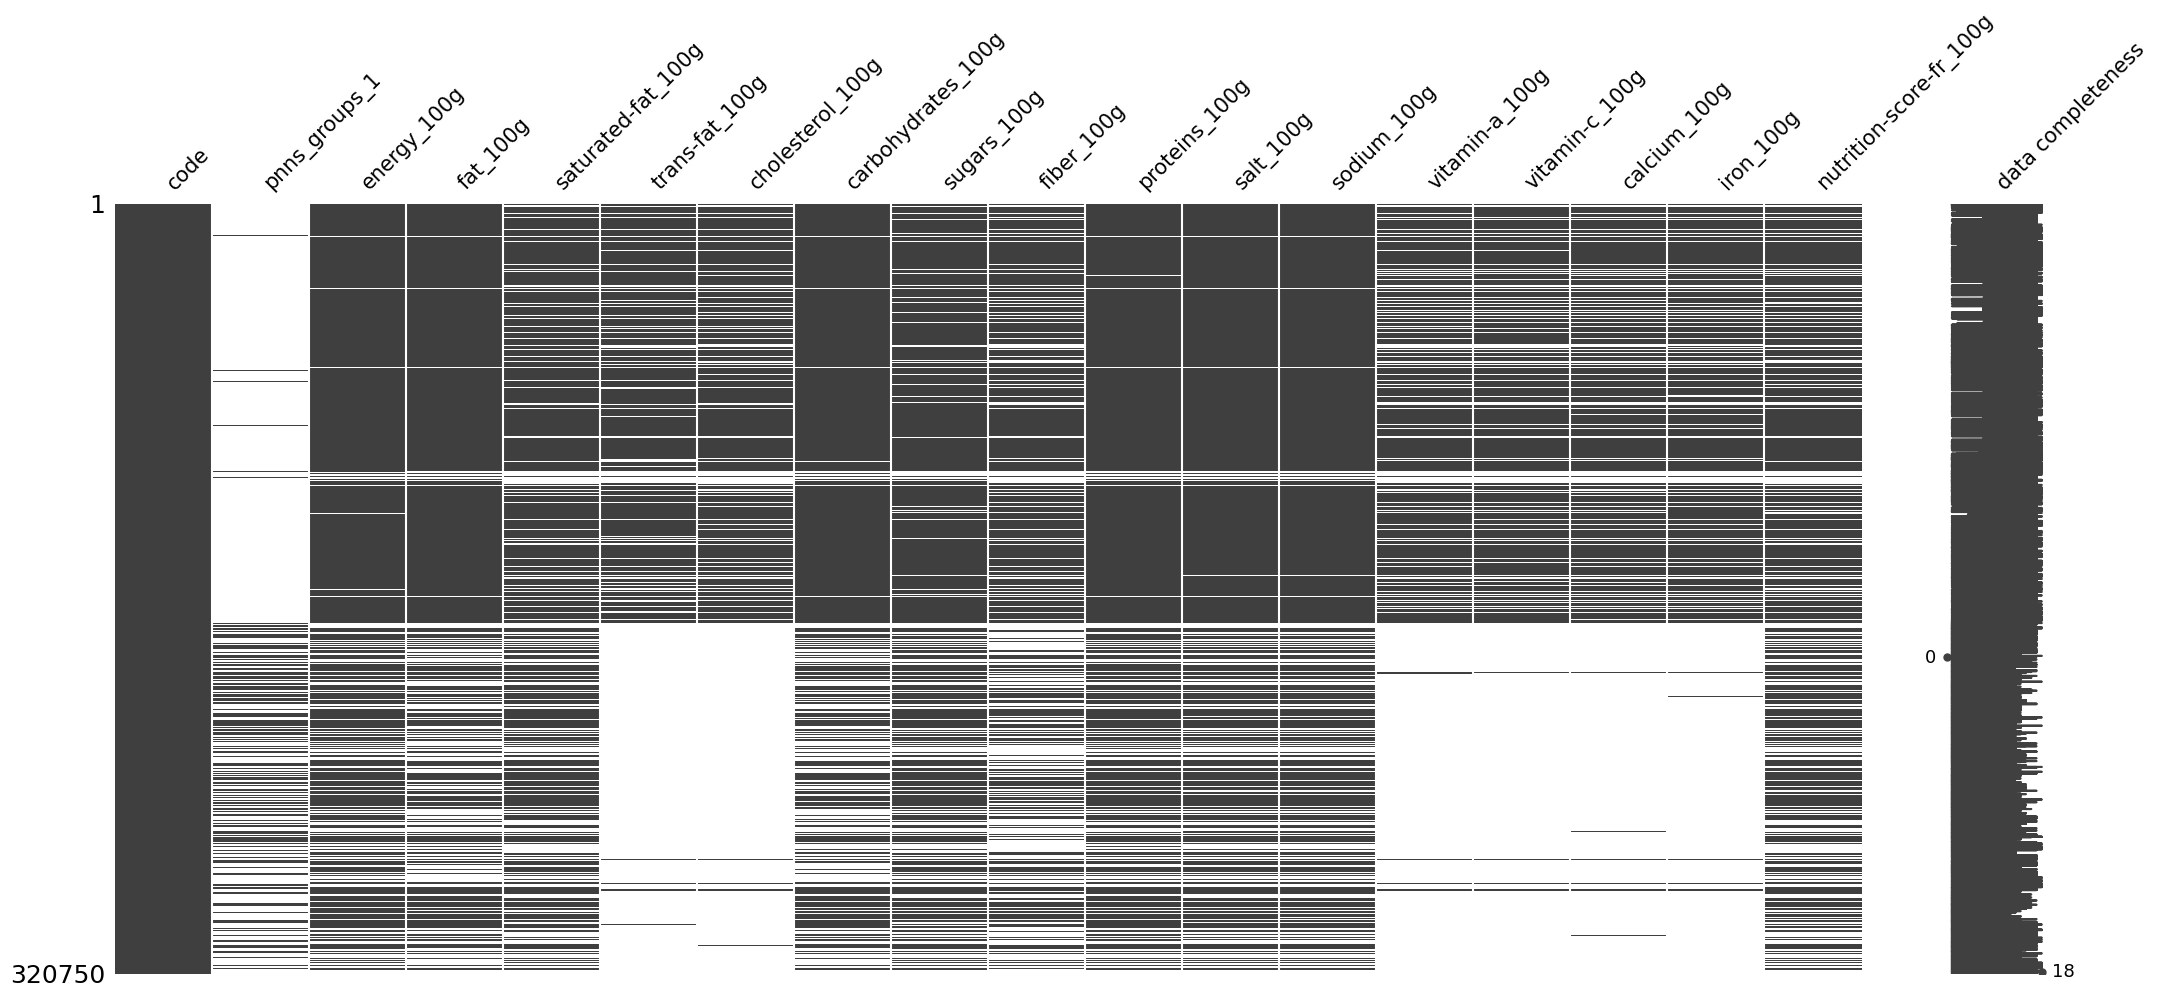

In [16]:
# Se débarasser des valeurs que l'on utilisera pas pour notre analyse (J'ai déjà réalisé le boxplot avec df3_pnns avant, et certaines données ne servait à rien, j'ai donc décidé d'itérer les graphiques qui viendront après avec df4 et df5)
df4_drop = df3_pnns.drop(columns=['url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'nutrition-score-uk_100g'])
msno.matrix(df4_drop, labels=True, fontsize=15)

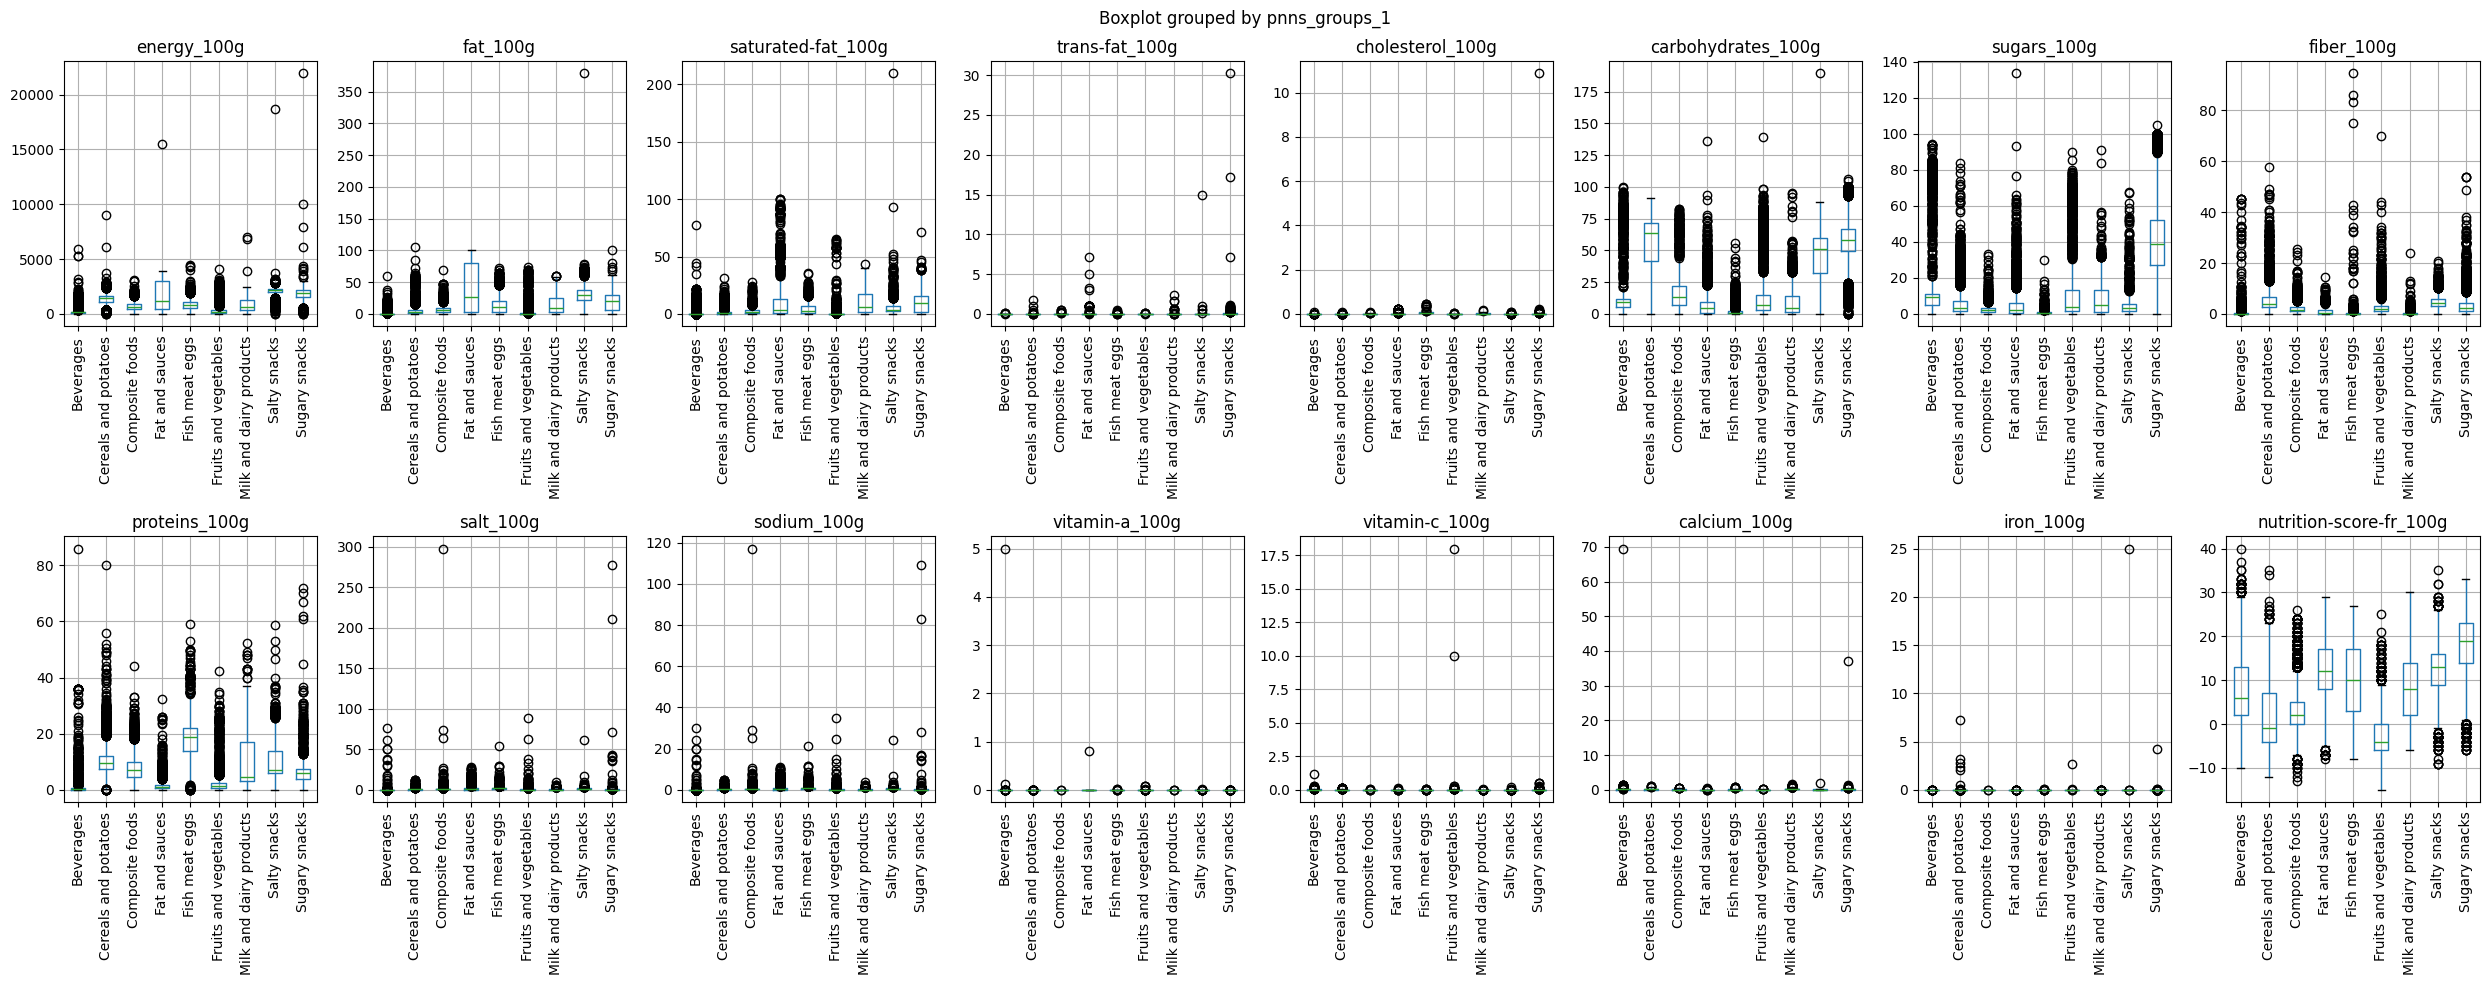

In [17]:
# Box plot pour chaque variable numérique et en fonction des catégories
import matplotlib.pyplot as plt

# Créations de variables pour afficher les boxplots en tableau et réduire l'espace occupé par les graphiques
num_cols = 8
num_rows = int(np.ceil(len(df4_drop.select_dtypes(include=['float64']).columns) / num_cols))


# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))

# Aplatir les axes pour faciliter l'indexation
axes = axes.flatten()

# Boucle pour créer les boxplots
for i, col in enumerate(df4_drop.select_dtypes(include=['float64']).columns):
    df4_drop.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

# Supprimer les axes inutilisés
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

# Afficher la figure
plt.tight_layout()
plt.show()

In [18]:
import numpy as np

df5_IQR = df4_drop.copy()

for category in df5_IQR['pnns_groups_1'].unique():
    category_data = df5_IQR[df5_IQR['pnns_groups_1'] == category]
    for col in df5_IQR.select_dtypes(include=['float64']).columns:
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des valeurs aberrantes par NaN pour la catégorie et la colonne courantes
        df5_IQR.loc[(df5_IQR['pnns_groups_1'] == category) & 
                    ((df5_IQR[col] < lower_bound) | (df5_IQR[col] > upper_bound)), col] = np.nan

# On affiche le nombre de valeurs remplacées par NaN
print(f"Nombre de valeurs remplacées par NaN : {df5_IQR.isna().sum().sum()}")


Nombre de valeurs remplacées par NaN : 2147209


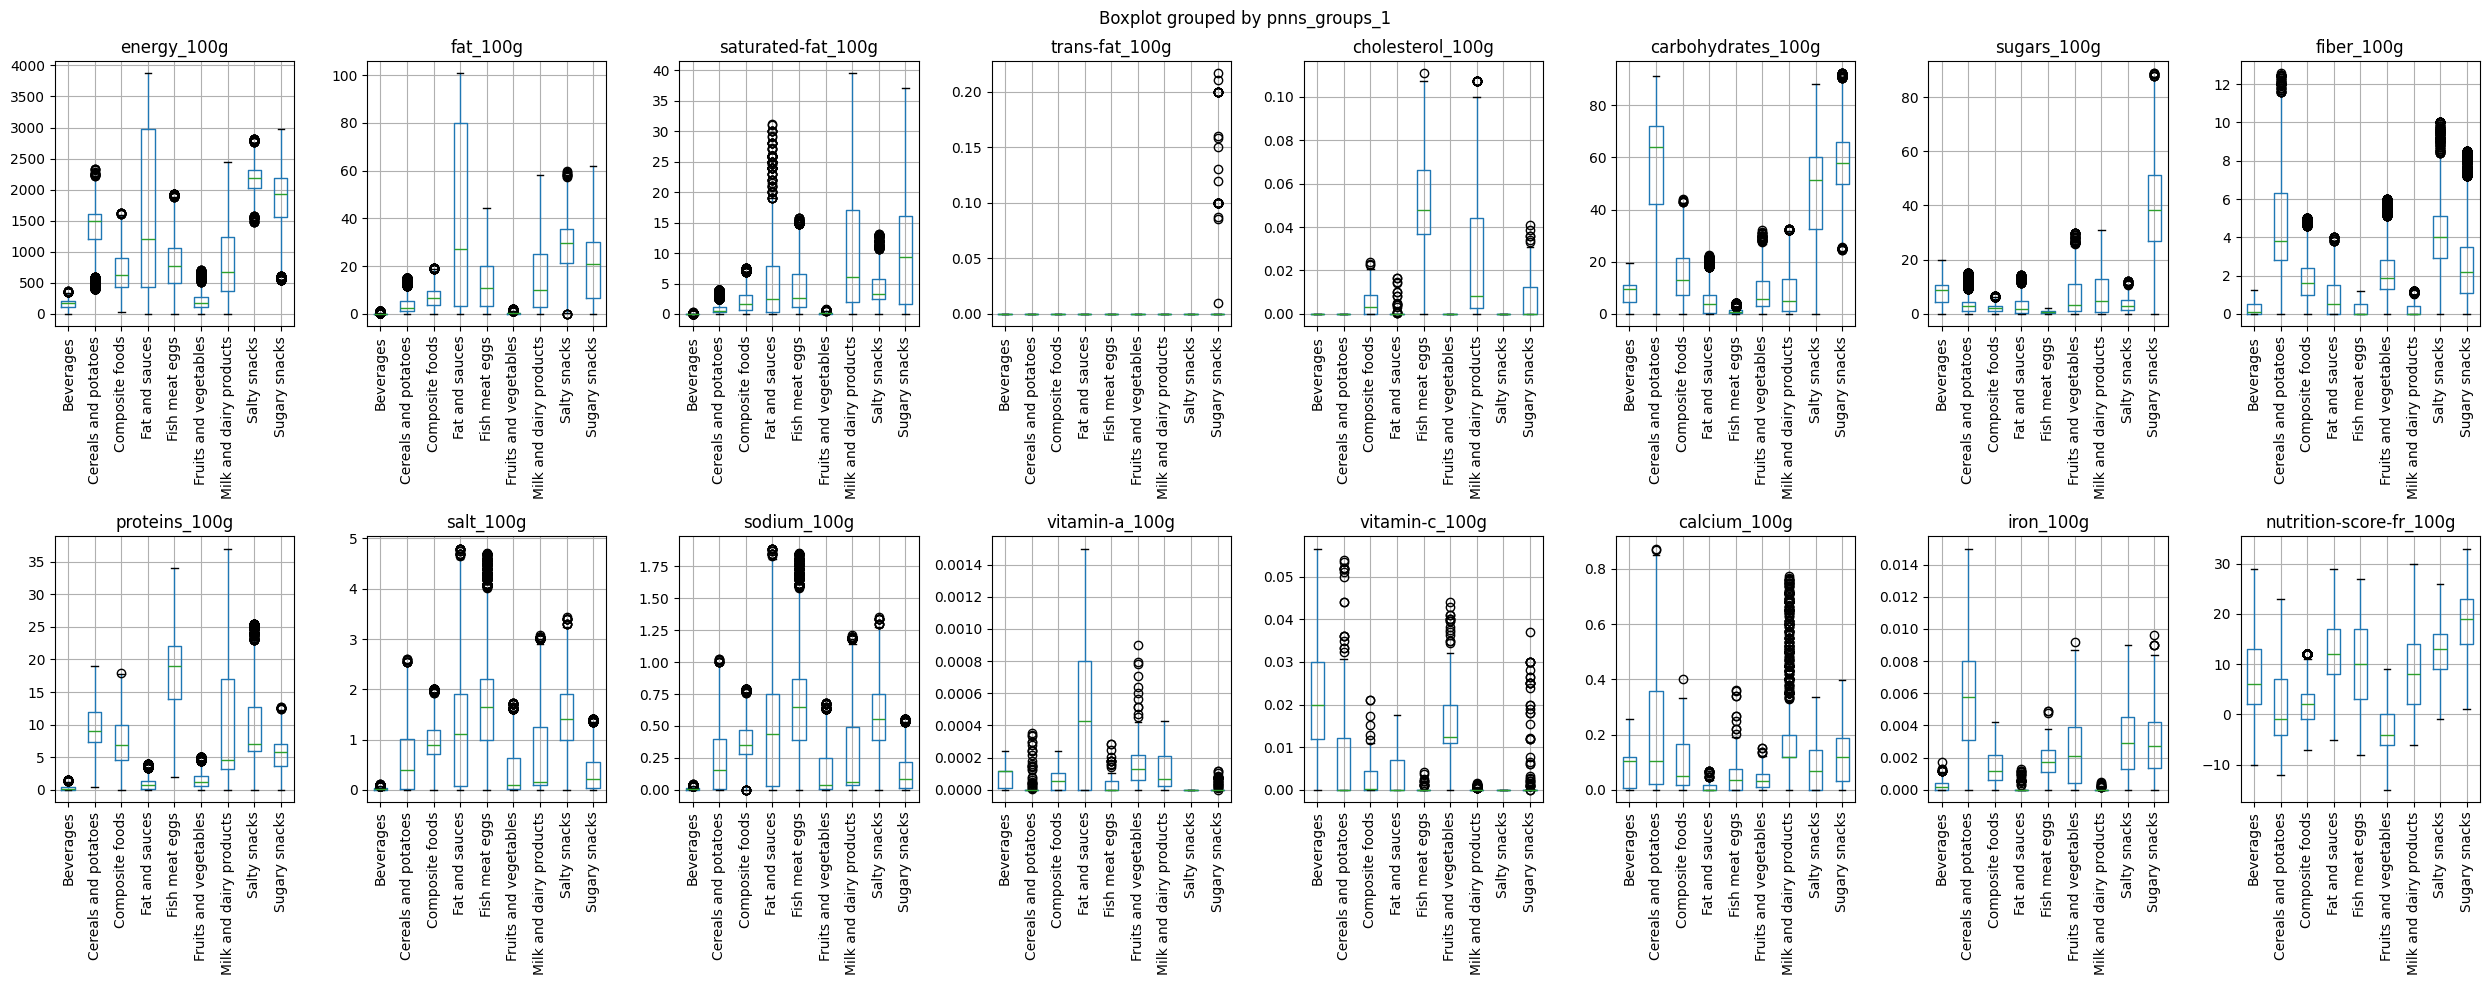

In [19]:
# On refait les boxplots avec df5_IQR
num_cols = 8
num_rows = int(np.ceil(len(df5_IQR.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df5_IQR.select_dtypes(include=['float64']).columns):
    df5_IQR.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    

Après notre nettoyage, on peut voir qu'une très grande proportion des outliers ont correctement été remplacé par des NaN. C'est une bonne nouvelle car ça va améliorer la pertinence de l'analyse suivante. Qui nous permettra de créer je l'espère des pnns groups.

Le découpage réalisé ne me satisfait pas, sans chercher très loin je pense qu'un coude à 3/4 valeurs semblent indiquer qu'à part des variables importantes comme l'énergie, le gras, le sucre et peut être les protéines il n'y aurait pas beaucoup d'influence. Ca peut paraitre envisageable mais pour conforter mes positions je vais réaliser d'autres analyse.

In [20]:
df10_pca = df5_IQR.copy()
df10_pca = df10_pca.select_dtypes(include=['float64'])

# remplacement des NaN par la médiane
df10_pca = df10_pca.fillna(df10_pca.median())

# Standardisation des données
scaler = StandardScaler()
X10 = df10_pca.select_dtypes(include=['float64'])
X10_scaled = scaler.fit_transform(X10)

NameError: name 'StandardScaler' is not defined

In [ ]:
# Réduction de dimension avec PCA
from sklearn.decomposition import PCA

pca = PCA()
X10_pca = pca.fit_transform(X10_scaled)

# Création d'un DataFrame pour visualiser les composantes principales
df10_pca = pd.DataFrame(X10_pca, columns=[f"PC{i+1}" for i in range(X10_pca.shape[1])])
print(df10_pca.head())

In [ ]:
# Affichage de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_, marker='o')  # Utilisation de pca.explained_variance_ratio_
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

# Affichage de la variance cumulée expliquée par les composantes principales
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')  # Utilisation de pca.explained_variance_ratio_
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.show()

In [ ]:
# Graphique des corrélations

def correlation_graph(pca, features):
    plt.figure(figsize=(12, 12))
    for i in range(pca.components_.shape[1]):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                  head_width=0.05, head_length=0.05, color='red')
        plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, 
                 features[i], color='red', ha='center', va='center', fontsize=12)
        
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
    plt.grid()
    plt.axhline(0, color='grey', ls='--')
    plt.axvline(0, color='grey', ls='--')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
    plt.gca().add_artist(circle)
    plt.title('Cercle des corrélations', fontsize=16)
    plt.show()

# Appel de la fonction avec les colonnes numériques de votre DataFrame
correlation_graph(pca, X10.columns)
import plotly.express as px

In [ ]:
# Graphique des corrélations

def correlation_graph(pca, features):
    plt.figure(figsize=(12, 12))
    for i in range(pca.components_.shape[1]):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                  head_width=0.05, head_length=0.05, color='red')
        plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, 
                 features[i], color='red', ha='center', va='center', fontsize=12)
        
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
    plt.grid()
    plt.axhline(0, color='grey', ls='--')
    plt.axvline(0, color='grey', ls='--')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
    plt.gca().add_artist(circle)
    plt.title('Cercle des corrélations', fontsize=16)
    plt.show()

# Appel de la fonction avec les colonnes numériques de votre DataFrame
correlation_graph(pca, df10_pca.columns)
import plotly.express as px

In [ ]:
# ... (reste du code inchangé)

# Création du DataFrame df10_pca (avec les noms de colonnes PC1, PC2, etc.)
df10_pca = pd.DataFrame(X10_pca, columns=[f"PC{i+1}" for i in range(X10_pca.shape[1])])

# Ajout de la colonne 'pnns_groups_1' et code au DataFrame df10_pca
df10_pca['code'] = df5_IQR['code'] # Ajout de la colonne 'code'
df10_pca['pnns_groups_1'] = df5_IQR['pnns_groups_1']  # Ajout de la colonne 'pnns_groups_1'


In [ ]:

fig = px.scatter(df10_pca, x='PC1', y='PC2', color='pnns_groups_1',
                 hover_data=df10_pca.columns,  # Show all columns on hover
                 title='ACP des produits en fonction de pnns_groups_1')
fig.update_traces(marker=dict(size=10, opacity=0.7))  # Adjust marker size and opacity
fig.show()

J'ai identifié un outlier code=3257983115628 Je vais le supprimer.

In [ ]:
# On va essayer de prédire les catégories de produits avec un modèle de classification
# 1. On filtre les colonnes pertinentes
colonne_pertinente = ['pnns_groups_1'] + ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
df12_filtré = df5_IQR[colonne_pertinente]
df12_filtré = df12_filtré.dropna(subset=['pnns_groups_1'])

# 2. Séparation des jeux de données en ensembles d'entraînement et de test
X = df12_filtré.drop(columns=['pnns_groups_1'])
y = df12_filtré['pnns_groups_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Imputation par knn
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
X_train_imputed = imputer_knn.fit_transform(X_train)
X_test_imputed = imputer_knn.transform(X_test)

# 4. One-hot encodage des variables catégorielles
encoder = OneHotEncoder(handle_unknown='ignore') # Remove sparse=True
X_train_encoded = encoder.fit_transform(X_train_imputed)

# 5. Scale features (Important Change!)
scaler_mean = StandardScaler(with_mean=False)
X_train_scaled = scaler_mean.fit_transform(X_train_encoded.toarray()) # Convert to dense array
X_test_scaled = scaler_mean.transform(encoder.transform(X_test_imputed).toarray())

# 6. Train and evaluate the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Création d'une matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Création d'un DataFrame pour une meilleure visualisation
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# On affiche les coefficients de la régression logistique
# Extraire les coefficients et les noms des colonnes
coefficients = model.coef_[0]
column_names = encoder.get_feature_names_out(X.columns)

# Affichage des coefficients
coefficients_df = pd.DataFrame({'Feature': column_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df.to_markdown(index=False))



In [ ]:
# Réalisation d'un anova avec les catégories de produits ainsi que les tests préalables (levene et kruskal-wallis)
from scipy.stats import f_oneway, levene, kruskal

# On filtre les colonnes pertinentes
colonne_pertinente = ['pnns_groups_1'] + ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
df13_filtré = df5_IQR[colonne_pertinente]
df13_filtré = df13_filtré.dropna(subset=['pnns_groups_1'])

# On réalise un test de Levene pour vérifier l'égalité des variances

# Sélection des catégories de produits
categories = df13_filtré['pnns_groups_1'].unique()

# Initialisation des listes pour stocker les résultats
levene_results = []

# Boucle sur les colonnes numériques
for col in df13_filtré.columns[1:]:
    # Initialisation des listes pour stocker les données
    data = []
    # Boucle sur les catégories de produits
    for category in categories:
        # Extraction des données pour la catégorie
        category_data = df13_filtré[df13_filtré['pnns_groups_1'] == category][col]
        data.append(category_data)
    # Test de Levene
    stat, p_value = levene(*data)
    levene_results.append((col, stat, p_value))

# Affichage des résultats
print("Résultats du test de Levene:")
for result in levene_results:
    print(f"{result[0]}: p-value = {result[2]:.3f}")



In [ ]:
# On réalise un test de Kruskal-Wallis pour vérifier l'égalité des moyennes

# Initialisation des listes pour stocker les résultats
kruskal_results = []

# Boucle sur les colonnes numériques
for col in df13_filtré.columns[1:]:
    # Initialisation des listes pour stocker les données
    data = []
    # Boucle sur les catégories de produits
    for category in categories:
        # Extraction des données pour la catégorie
        category_data = df13_filtré[df13_filtré['pnns_groups_1'] == category][col]
        data.append(category_data)
    # Test de Kruskal-Wallis
    stat, p_value = kruskal(*data)
    kruskal_results.append((col, stat, p_value))

# Affichage des résultats
print("\nRésultats du test de Kruskal-Wallis:")
for result in kruskal_results:
    print(f"{result[0]}: p-value = {result[2]:.3f}")


In [ ]:
# On réalise un test d'ANOVA pour vérifier l'égalité des moyennes

# Initialisation des listes pour stocker les résultats
anova_results = []

# Boucle sur les colonnes numériques

for col in df13_filtré.columns[1:]:

    # Initialisation des listes pour stocker les données
    data = []
    # Boucle sur les catégories de produits
    for category in categories:
        # Extraction des données pour la catégorie
        category_data = df13_filtré[df13_filtré['pnns_groups_1'] == category][col]
        data.append(category_data)
    # Test d'ANOVA
    stat, p_value = f_oneway(*data)
    anova_results.append((col, stat, p_value))

# Affichage des résultats

print("\nRésultats du test d'ANOVA:")
for result in anova_results:
    print(f"{result[0]}: p-value = {result[2]:.3f}")    
    

In [ ]:
df13_filtré.isnull().sum()

In [ ]:
df13_filtré['pnns_groups_1'].value_counts()

In [ ]:
from scipy.stats import f_oneway, levene, kruskal
from sklearn.impute import SimpleImputer
import pandas as pd

# Filtrage des données pertinentes
colonnes_pertinentes = ['pnns_groups_1'] + ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

# Créer un imputer pour remplacer les NaN par la moyenne de la colonne
imputer = SimpleImputer(strategy='mean')

# Imputer les valeurs manquantes dans les colonnes pertinentes
df13_filtré_imputed = pd.DataFrame(imputer.fit_transform(df13_filtré[df13_filtré.columns[1:]]), columns=df13_filtré.columns[1:])
df13_filtré_imputed['pnns_groups_1'] = df13_filtré['pnns_groups_1']

# Tests statistiques
print("\nRésultats du test de Levene:")
for col in df13_filtré.columns[1:]:
    categories_data = [df13_filtré[df13_filtré['pnns_groups_1'] == cat][col].dropna() for cat in df13_filtré['pnns_groups_1'].unique()]
    if all(len(cat_data) > 1 for cat_data in categories_data):  # Vérifier si chaque catégorie a au moins 2 échantillons
        stat, p_value = levene(*categories_data)
        print(f"{col}: p-value = {p_value:.3f}")
    else:
        print(f"{col}: Pas assez d'échantillons pour effectuer le test de Levene")

print("\nRésultats du test de Kruskal-Wallis:")
for col in df13_filtré.columns[1:]:
    categories_data = [df13_filtré[df13_filtré['pnns_groups_1'] == cat][col].dropna() for cat in df13_filtré['pnns_groups_1'].unique()]
    if all(len(cat_data) > 1 for cat_data in categories_data):
        stat, p_value = kruskal(*categories_data)
        print(f"{col}: p-value = {p_value:.3f}")
    else:
        print(f"{col}: Pas assez d'échantillons pour effectuer le test de Kruskal-Wallis")

print("\nRésultats du test d'ANOVA:")
for col in df13_filtré.columns[1:]:
    categories_data = [df13_filtré[df13_filtré['pnns_groups_1'] == cat][col].dropna() for cat in df13_filtré['pnns_groups_1'].unique()]
    if all(len(cat_data) > 1 for cat_data in categories_data):
        stat, p_value = f_oneway(*categories_data)
        print(f"{col}: p-value = {p_value:.3f}")
    else:
        print(f"{col}: Pas assez d'échantillons pour effectuer le test d'ANOVA")


In [ ]:
import numpy as np
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Initialisation
colonnes = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
groups = df13_filtré['pnns_groups_1'].unique()

# Fonction pour effectuer des tests post-hoc
def posthoc_tests(data, groups, column):
    p_values = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            group1 = data[data['pnns_groups_1'] == groups[i]][column].dropna()
            group2 = data[data['pnns_groups_1'] == groups[j]][column].dropna()
            if len(group1) > 1 and len(group2) > 1:
                _, p = mannwhitneyu(group1, group2)
                p_values.append(p)
    return p_values

# Effectuer des tests post-hoc avec correction de Bonferroni
for col in colonnes:
    p_values = posthoc_tests(df13_filtré, groups, col)
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]
    print(f"\nPost-hoc tests for {col}:")
    for i, p in enumerate(corrected_p_values):
        print(f"Comparison {i + 1}: p-value = {p:.3f}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, levene, mannwhitneyu, kruskal
from statsmodels.stats.multitest import multipletests
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Remplacer par votre DataFrame
# df13_filtré = ...  # assurez-vous que votre DataFrame est bien chargé

# Vérification de la normalité
print("\nVérification de la normalité (test de Shapiro-Wilk):")
for col in colonnes:
    stat, p = shapiro(df13_filtré[col].dropna())
    print(f"{col}: p-value de Shapiro-Wilk = {p:.3f}")

# ANOVA de Welch
print("\nRésultats du test d'ANOVA de Welch:")
for col in colonnes:
    formula = f'{col} ~ C(pnns_groups_1)'
    model = ols(formula, data=df13_filtré).fit()
    anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')
    print(f"{col}: p-value = {anova_table['PR(>F)'][0]:.3f}")

# Fonction pour effectuer des tests post-hoc
def posthoc_tests(data, groups, column):
    p_values = []
    comparisons = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            group1 = data[data['pnns_groups_1'] == groups[i]][column].dropna()
            group2 = data[data['pnns_groups_1'] == groups[j]][column].dropna()
            if len(group1) > 1 and len(group2) > 1:
                _, p = mannwhitneyu(group1, group2)
                p_values.append(p)
                comparisons.append(f"{groups[i]} vs {groups[j]}")
    return p_values, comparisons

# Initialisation des colonnes et des groupes
colonnes = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
groups = df13_filtré['pnns_groups_1'].unique()

# Effectuer des tests post-hoc avec correction de Bonferroni
results = []
for col in colonnes:
    p_values, comparisons = posthoc_tests(df13_filtré, groups, col)
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]
    for i, p in enumerate(corrected_p_values):
        results.append([col, comparisons[i], p])

# Création d'un DataFrame pour les résultats
results_df = pd.DataFrame(results, columns=['Variable', 'Comparison', 'Corrected p-value'])

# Affichage des résultats
results_df_sorted = results_df.sort_values(by=['Variable', 'Corrected p-value'])
print(results_df_sorted)

# Visualisation des Boxplots sur un même Graphique
plt.figure(figsize=(14, 8))
for i, col in enumerate(colonnes):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='pnns_groups_1', y=col, data=df13_filtré)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Afficher la figure
plt.show()
